In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/FML/Wine.csv')
dataset = data

In [ ]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:,13].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) #check for None
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance_ = pca.explained_variance_ratio_ #eigen value
explained_variance_

array([0.36884109, 0.19318394])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.metrics import accuracy_score

prediction = accuracy_score(y_test,y_pred)
prediction*100

97.22222222222221

<ipython-input-68-475fccae1751>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


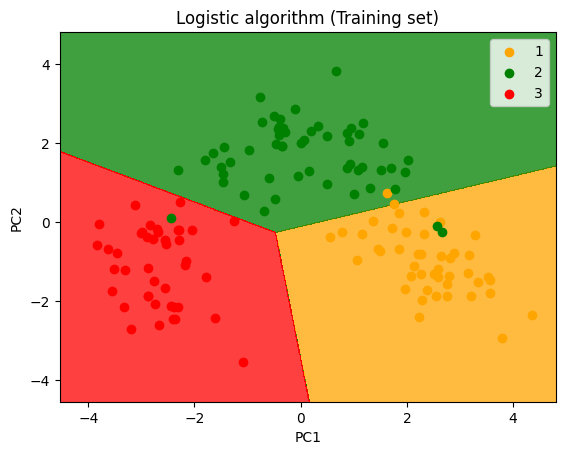

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = X_train ,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('orange','green','red')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('orange','green','red'))(i),label =j)
plt.title('Logistic algorithm (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-76-21e43bf76151>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


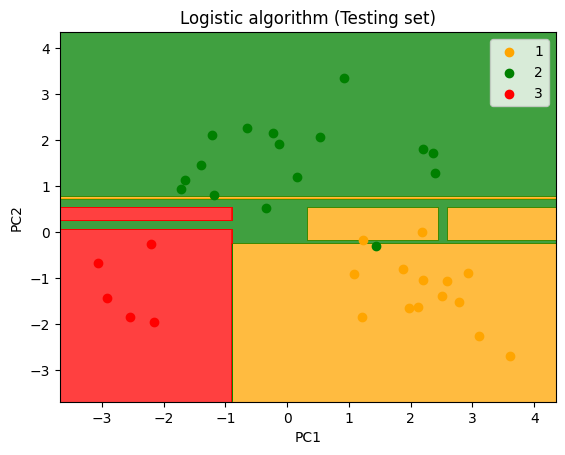

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = X_test ,y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('orange','green','red')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('orange','green','red'))(i),label =j)
plt.title('Logistic algorithm (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.metrics import accuracy_score

prediction = accuracy_score(y_test,y_pred)
prediction*100

97.22222222222221

[Text(0.5769230769230769, 0.9375, 'x[1] <= 0.542\nentropy = 1.575\nsamples = 142\nvalue = [45, 55, 42]'),
 Text(0.3076923076923077, 0.8125, 'x[0] <= -0.895\nentropy = 1.217\nsamples = 90\nvalue = [44, 4, 42]'),
 Text(0.15384615384615385, 0.6875, 'x[1] <= 0.061\nentropy = 0.159\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(0.07692307692307693, 0.5625, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.23076923076923078, 0.5625, 'x[1] <= 0.259\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.15384615384615385, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3076923076923077, 0.4375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.6875, 'x[1] <= -0.243\nentropy = 0.342\nsamples = 47\nvalue = [44, 3, 0]'),
 Text(0.38461538461538464, 0.5625, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5384615384615384, 0.5625, 'x[1] <= -0.188\nentropy = 0.918\nsamples = 9\nvalue = [6, 3, 0]'),
 Text(0.46153846153846156, 0.4375

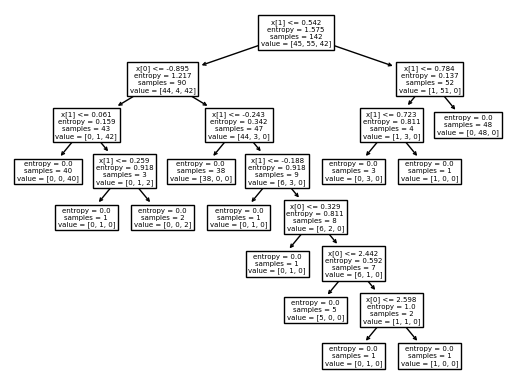

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

<ipython-input-78-66dbc1abdd78>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


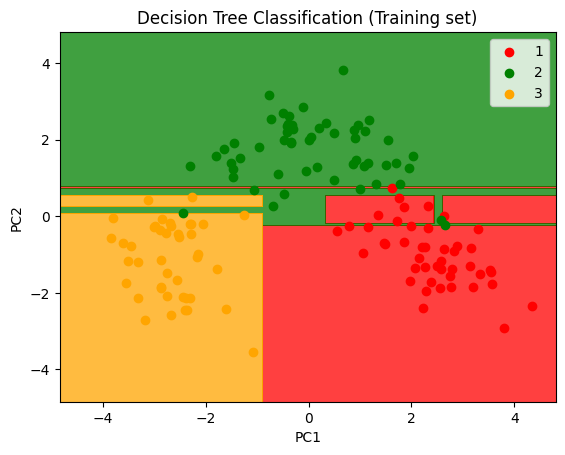

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','orange')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','green','orange'))(i),label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-77-88024cd21846>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


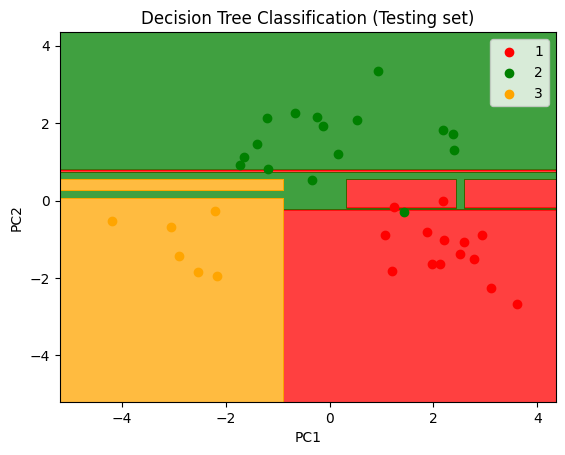

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','orange')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','green','orange'))(i),label=j)
plt.title('Decision Tree Classification (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

KNN Classifier

In [ ]:
#Fitting Decision Tree Classification to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_test,y_pred)
print("Accuracy:",prediction*100,"%")

Accuracy: 97.22222222222221 %


<ipython-input-85-66dbc1abdd78>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


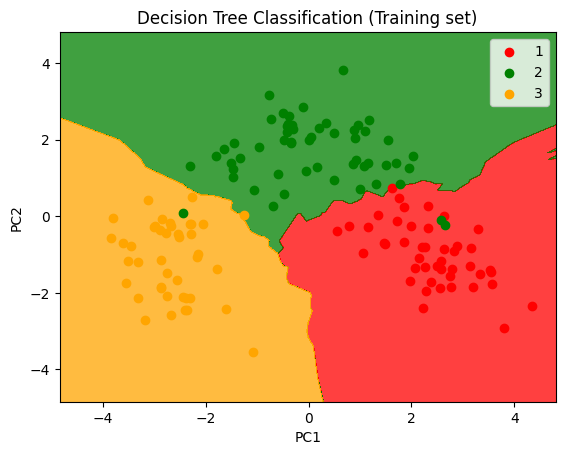

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','orange')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','green','orange'))(i),label=j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-84-88024cd21846>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


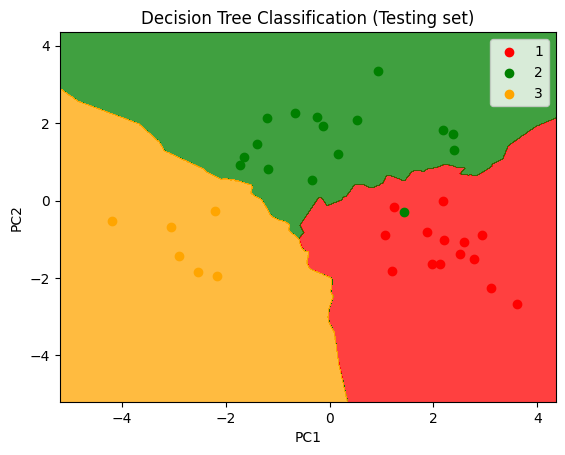

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','orange')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','green','orange'))(i),label=j)
plt.title('Decision Tree Classification (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()